In [41]:
import os
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import gala.potential as gp
import numpy as np
from gala.units import galactic, solarsystem, dimensionless
import HeaderP

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [137]:
G,Ma,a=4.3009e-6,0.8e12,15 #(these values from prelab)
def potential(x,Ma,a):
    return -G*Ma/(x+a)

def calc_eff(x):
    return 0.5*(L**2/x**2)+potential(x,0.8e12,15)-E

extremes are: [ 6.37524996 10.42811163]


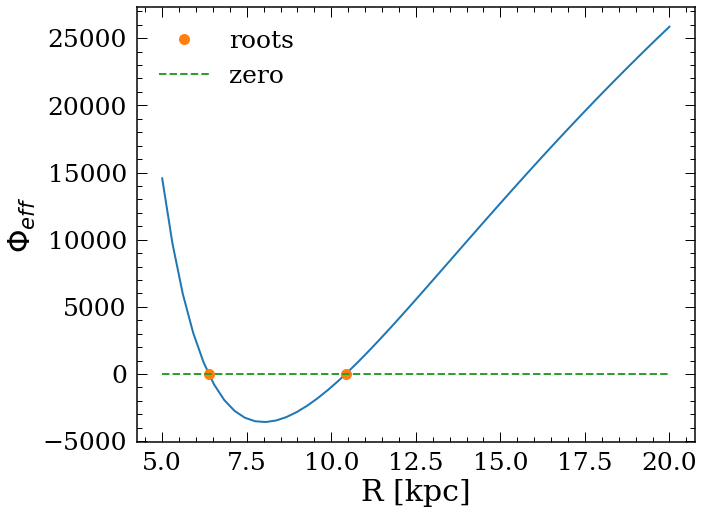

In [175]:
from scipy import optimize

def getcenters(E,L):
    x=np.linspace(5,20,50)
    effpot=calc_eff(x)

    rootguess=[]
    
    if abs(effpot[0])==effpot[0]:
        positive=True
    elif abs(effpot[0])!=effpot[0]:
        positive=False
    
    for i in range(1,len(effpot)):
        if abs(effpot[i])==effpot[i]:
            check_pot=True
        else:
            check_pot=False
        if positive!=check_pot:
            rootguess.append(x[i])
            positive=check_pot

    roots=np.zeros(len(rootguess))
    if len(rootguess)==0:
        print('no roots...')
    else:
        for i in range(len(rootguess)):
            roots[i]=optimize.newton(calc_eff, rootguess[i])
    return roots


x=8
# specify L, E
L=x*np.sqrt(G*Ma*x/(x+a)**2)
E=-120000

roots=getcenters(E,L)

x=np.linspace(5,20,50)
plt.figure(figsize=(10,8))
plt.plot(x,calc_eff(x))
plt.plot(roots,np.zeros(len(roots)),'o',label='roots',markersize=10)
plt.plot([min(x),max(x)],[0,0],'--',label='zero')
plt.legend()
plt.xlabel('R [kpc]')
plt.ylabel('$\Phi_{eff}$')
print('extremes are:',roots)

In [176]:
# 1(b)
def intfunc(r):
    rdot=np.sqrt(2*(E-potential(r,0.8e12,15))-L**2./r**2.)
    return 1/rdot



from scipy import integrate
roots=getcenters(E,L)
omega=2*integrate.quad(intfunc, min(roots), max(roots))[0]

def intfunc_wdot(r):
    rdot=np.sqrt(2*(E-potential(r,0.8e12,15))-L**2./r**2.)
    return L/r**2./rdot

dw=integrate.quad(intfunc_wdot, min(roots), max(roots))
print('it takes',2*np.pi/dw[0],'orbits to precess back!')


wdot=omega*2*np.pi/integrate.quad(intfunc_wdot, min(roots), max(roots))[0]

#print(omega,wdot)
#print(2*np.pi/wdot)

it takes 3.0455117730666865 orbits to precess back!


In [ ]:
# attemp to integrate myself... didn't really work
def gx(x,y,z):
    #print(((x**2+y**2+z**2)**0.5+a)**-2,((x**2+y**2+z**2)**-0.5))
    r=-(x**2+y**2+z**2)**0.5
    return G*Ma*x/(r+a)**2/r

def gy(x,y,z):
    return gx(y,x,z)

def gz(x,y,z):
    return gx(z,x,y)


start_pos=[8,0,0]

kine=E-potential(8,Ma,a)
#print(np.sqrt(2*kine))

#start_vel=[0,np.sqrt(2*kine),0]
start_vel=[0,0,0]

dt=1e-10
steps=500

xs=np.zeros(steps)
ys=np.zeros(steps)
zs=np.zeros(steps)

vxs=np.zeros(steps)
vys=np.zeros(steps)
vzs=np.zeros(steps)

xs[0],ys[0],zs[0]=start_pos[0],start_pos[1],start_pos[2]
vxs[0],vys[0],vzs[0]=start_vel[0],start_vel[1],start_vel[2]

for i in range(1,steps):
    print(gx(xs[i-1],ys[i-1],zs[i-1]))
    vxs[i]=vxs[i-1]+gx(xs[i-1],xs[i-1],zs[i-1])*dt
    vys[i]=vys[i-1]+gy(xs[i-1],xs[i-1],zs[i-1])*dt
    vzs[i]=vzs[i-1]+gz(xs[i-1],xs[i-1],zs[i-1])*dt
    
    xs[i]=xs[i-1]+vxs[i-1]*dt
    ys[i]=ys[i-1]+vys[i-1]*dt
    zs[i]=zs[i-1]+vzs[i-1]*dt

plt.plot(xs,ys)


It takes ~3 orbits to process back to it's orginal orbit, this means I should be seeing a 3 petal shape after integrating the orbit (which is what I see). Starting the orbit at pericenter (smaller root of the solution from part 1(a), I get the right peri- and apo- center). 

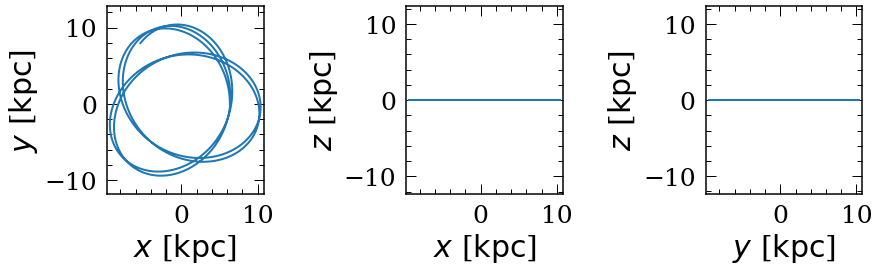

In [185]:
# 1(c)
pot = gp.HernquistPotential(m=0.8e12*u.Msun, c=15.*u.kpc, units=galactic)

peri=6.37524996
kine=E-potential(peri,Ma,a)

w0 = gd.PhaseSpacePosition(pos=[peri, 0., 0.]*u.kpc,vel=[0., np.sqrt(2*kine), 0]*u.km/u.s)
orbit = gp.Hamiltonian(pot).integrate_orbit(w0, dt=1., n_steps=1000)
fig = orbit.plot()

In [186]:
print(orbit.pericenter())
print(orbit.apocenter())

6.375250001284485 kpc
10.430516394370333 kpc
